# **Perkenalan**

=================================================

Milestone 2

Nama  : Habibi Bagus Suliano

Batch : HCK-009


=================================================

### **Prediksi Harga mobil**

**Latar Belakang**:

Penentuan harga mobil bekas sering kali menjadi sebuah tantangan sendiri. Pasalnya, ada banyak parameter yang harus dipertimbangkan seperti jarak tempuh, model mobil, dsb. yang kadang kala membuat penentuan harga tidak akurat sehingga kadangkala terlalu mahal atau terlalu murah. Jika terlalu mahal akan merugikan pembeli namun jika terlalu murah maka merugikan penjual. Untuk itu, dibutuhkan model agar dapat memprediksi harga mobil berdasarkan data yang ada.

#### **Informasi untuk setiap kolom**

| No. | Nama Kolom | Deskripsi |
|-----|----------- | --------- |
|1|Id | Pengidentifikasi unik untuk setiap daftar mobil |
|2|Price | Kisaran harga mobil, dengan label harga dan hitungan tertentu |
|3|Company Name| Nama perusahaan manufaktur mobil, dengan persentase keterwakilan masing-masing perusahaan |
|4|Model Name| Nama model mobil, dengan persentase representasi masing-masing model |
|5|Model Year| Kisaran tahun pembuatan mobil, dengan jumlah dan persentase  |
|6|Location| Lokasi mobil, menentukan wilayah di mana mobil tersebut tersedia untuk dibeli, beserta persentasenya |
|7|Mileage| Informasi tentang jarak tempuh mobil, dengan rentang jarak tempuh, jumlah, dan persentase|
|8|Engine Type | Deskripsi tipe mesin, dengan persentase untuk setiap tipe |
|9|Engine Capacity | Kapasitas mesin berkisar dengan hitungan dan persentase |
|10|Color | Distribusi warna mobil, dengan persentase untuk setiap warna |

# **Import Libraries**

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import pickle 
import warnings
from time import time

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

# model 
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# **Data Loading**

In [167]:
data = pd.read_csv('car_prices.csv')
data

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46017,46018,Honda,Vezel,3400000,2015,Punjab,32000,Petrol,1500,Black,Imported,Cross Over,Automatic,Un-Registered
46018,46019,Toyota,Aqua,2450000,2015,Punjab,52000,Petrol,1500,Blue,Imported,Hatchback,Automatic,Un-Registered
46019,46020,Honda,Civic,3250000,2015,Punjab,125000,Petrol,1800,Black,Local,Sedan,Automatic,Registered
46020,46021,Toyota,Aqua,3000000,2016,Punjab,60000,Petrol,1500,Black,Imported,Hatchback,Automatic,Registered


In [168]:
# menghapus kolom dengan nama 'Unnamed: 0' dari DataFrame
del data['Unnamed: 0']

Menghapus kolom unnamed 0 dikarenakan kolom itu tidak berguna maka saya akan hapus

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company Name         46022 non-null  object
 1   Model Name           46022 non-null  object
 2   Price                46022 non-null  int64 
 3   Model Year           46022 non-null  int64 
 4   Location             46022 non-null  object
 5   Mileage              46022 non-null  int64 
 6   Engine Type          46022 non-null  object
 7   Engine Capacity      46022 non-null  int64 
 8   Color                46022 non-null  object
 9   Assembly             46022 non-null  object
 10  Body Type            46022 non-null  object
 11  Transmission Type    46022 non-null  object
 12  Registration Status  46022 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.6+ MB


Tidak ada missing values pada data, paling tidak berdasarkan dari apa yang terlihat dan terbaca oleh Pandas.

In [170]:
data.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [187]:
data.duplicated().sum()

815

setelah di cek ada data duplicate dan saya akan menghilangkan data yang duplicate

In [189]:
data.drop_duplicates(inplace=True)

In [235]:
print('data duplicate :',data.duplicated().sum())

data duplicate : 0


seperti terlihat diatas data dplicate sudah tidak ada

# **Exploratory Data Analysis (EDA)**

#### **Number of records related to year of the car bought**

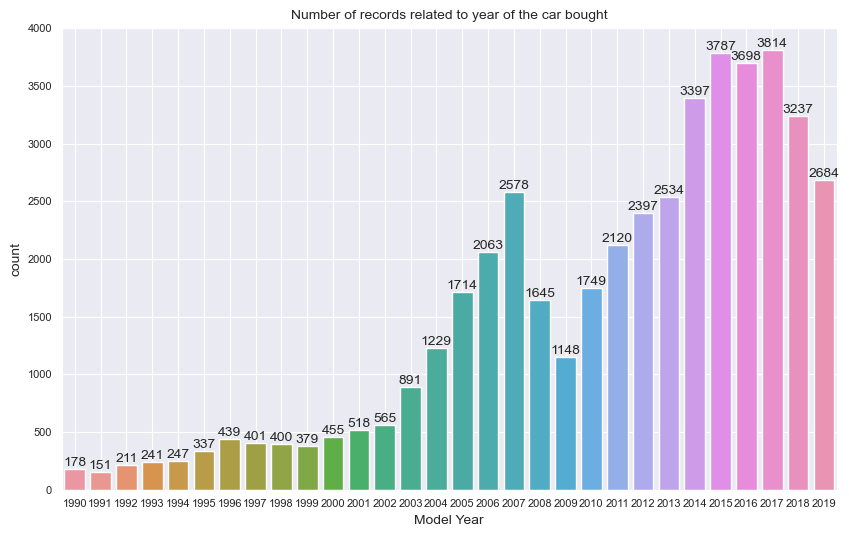

In [191]:
# Number of records related to year of the car bought
plt.figure(figsize = (10, 6))
ax=sns.countplot(data=data, x=data['Model Year'])
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Number of records related to year of the car bought', size=10)
plt.yticks(size=8)
plt.xticks(size=8)
plt.grid(linestyle='-')


dilihat dari hasil visualisasi diatas tahun 2017 adalah tahun paling banyak orang membeli mobil

#### **korelasi antara harga dan mileage**

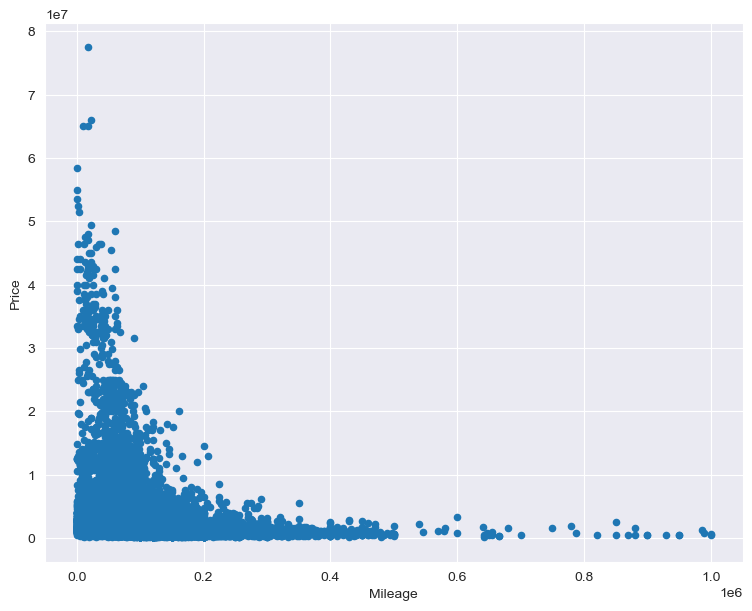

In [192]:
# Create scatter plots to visualize the relationships between pairs of numerical values
data.plot(kind='scatter', x='Mileage', y='Price', figsize=(9, 7))
plt.show()

ternyata mileage mempengaruhi harga dilihat diatas bahwa kebanyakan mileage yang dikit mendapatkan harga yang tinggi

#### **korelasi antara harga dan engine capacity**

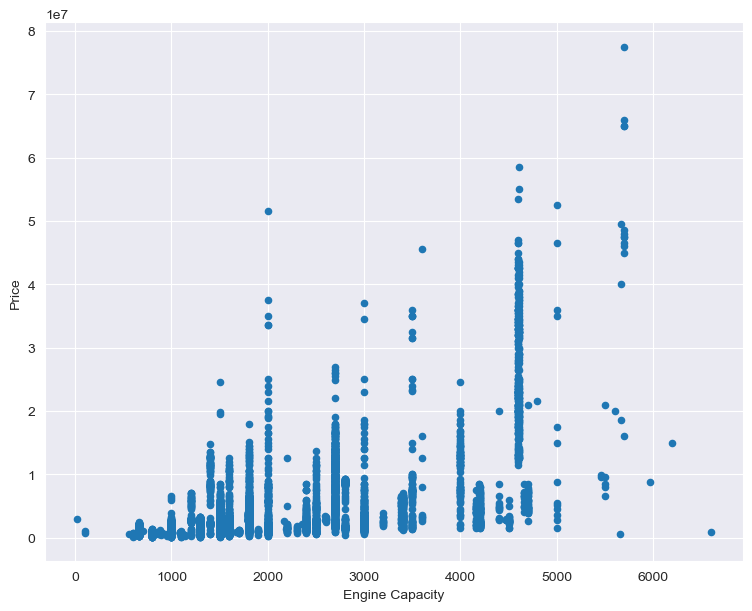

In [193]:
data.plot(kind='scatter', x='Engine Capacity', y='Price', figsize=(9, 7))
plt.show()

dilihat dari visualisai bahwa engine capacity mempengaruhi harga semakin tinggi engine capacitynya harga juga akan semakin tinggi

#### **Menampilkan company name yang paling banyak muncul**

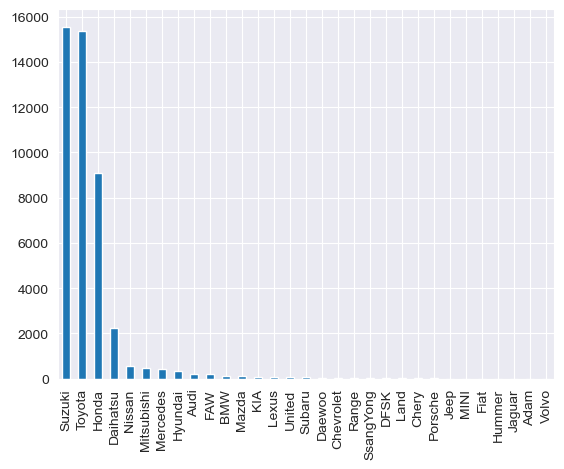

In [194]:
# Create a bar chart to visualize the frequency of categorical values
data['Company Name'].value_counts().plot(kind='bar')
plt.show()

terlihat bahwa paling banyak nama perusahaan yang selalu muncul namanya adalah suzuki

#### **Menampilkan body type yang paling banyak muncul**

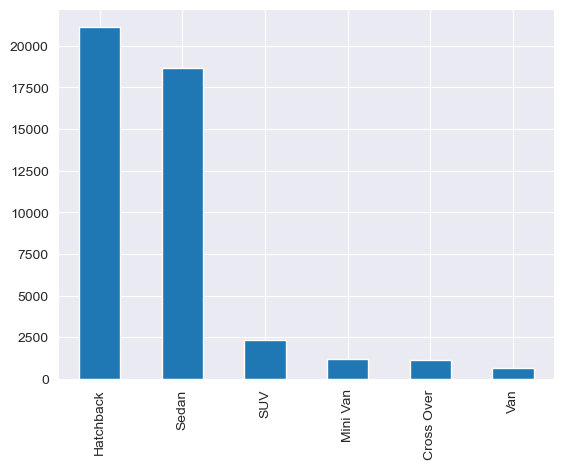

In [195]:
# Create a bar chart to visualize the frequency of categorical values
data['Body Type'].value_counts().plot(kind='bar')
plt.show()

terlihat dari data visualisasi body type yang paling banyak dipilih adalah hatchback

#### **harga jual tiap tahun**

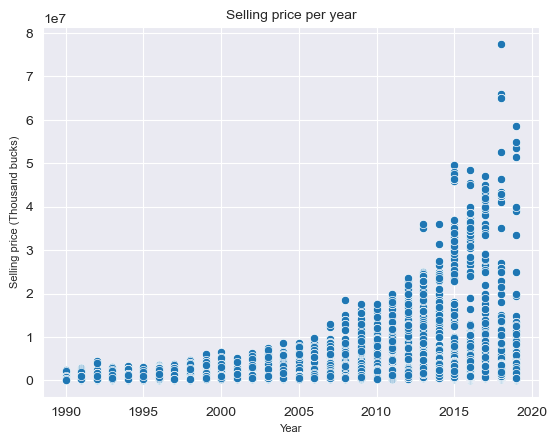

In [196]:
# plotting the target-year scatter graph
sns.scatterplot(data=data, x="Model Year", y="Price")
sns.set_style('darkgrid')
plt.title("Selling price per year", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Year", size=8)
plt.show()

keluaran tahun mobil mempengaruhi harga dilihat dari scatterplot bahwa semakin mobil itu keluaran terbaru maka harga semakin tinggi

#### **Jumlah Kendaraan Berdasarkan Transmission Type**

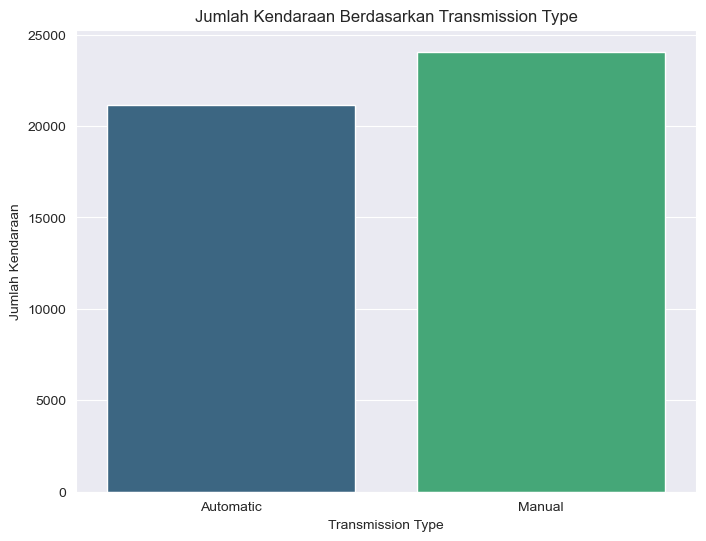

In [197]:

plt.figure(figsize=(8, 6))

# Menampilkan Transmission Type dengan Seaborn
sns.countplot(data=data, x='Transmission Type', palette='viridis')
plt.title('Jumlah Kendaraan Berdasarkan Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=0)  # Untuk memutar label x jika diperlukan

plt.show()

terlihat lebih banyak kendaran manual daripada automatic

# **Feature Engineering**

memisahkan kolom numerikal dan kategorikal

In [198]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Company Name',
 'Model Name',
 'Location',
 'Engine Type',
 'Color',
 'Assembly',
 'Body Type',
 'Transmission Type',
 'Registration Status']

In [199]:
cat_dt = data[cat_cols]
cat_dt

,Company Name,Model Name,Location,Engine Type,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,Islamabad,Petrol,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,KPK,Petrol,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,KPK,Petrol,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,Punjab,Petrol,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,Islamabad,Petrol,Black,Local,Sedan,Manual,Registered
...,...,...,...,...,...,...,...,...,...
46017,Honda,Vezel,Punjab,Petrol,Black,Imported,Cross Over,Automatic,Un-Registered
46018,Toyota,Aqua,Punjab,Petrol,Blue,Imported,Hatchback,Automatic,Un-Registered
46019,Honda,Civic,Punjab,Petrol,Black,Local,Sedan,Automatic,Registered
46020,Toyota,Aqua,Punjab,Petrol,Black,Imported,Hatchback,Automatic,Registered


In [200]:
cat_dt['Price'] = data['Price']
cat_dt

,Company Name,Model Name,Location,Engine Type,Color,Assembly,Body Type,Transmission Type,Registration Status,Price
0,Toyota,Vitz,Islamabad,Petrol,Silver,Imported,Hatchback,Automatic,Un-Registered,2385000
1,Toyota,Corolla,KPK,Petrol,White,Local,Sedan,Automatic,Registered,111000
2,Suzuki,Alto,KPK,Petrol,White,Local,Hatchback,Automatic,Un-Registered,1530000
3,Suzuki,Alto,Punjab,Petrol,White,Local,Hatchback,Manual,Registered,1650000
4,Toyota,Corolla,Islamabad,Petrol,Black,Local,Sedan,Manual,Registered,1435000
...,...,...,...,...,...,...,...,...,...,...
46017,Honda,Vezel,Punjab,Petrol,Black,Imported,Cross Over,Automatic,Un-Registered,3400000
46018,Toyota,Aqua,Punjab,Petrol,Blue,Imported,Hatchback,Automatic,Un-Registered,2450000
46019,Honda,Civic,Punjab,Petrol,Black,Local,Sedan,Automatic,Registered,3250000
46020,Toyota,Aqua,Punjab,Petrol,Black,Imported,Hatchback,Automatic,Registered,3000000


In [201]:
num_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()
num_cols

['Price', 'Model Year', 'Mileage', 'Engine Capacity']

In [202]:
num_dt = data[num_cols]
num_dt

,Price,Model Year,Mileage,Engine Capacity
0,2385000,2017,9869,1000
1,111000,2019,11111,1300
2,1530000,2019,17500,660
3,1650000,2019,9600,660
4,1435000,2010,120000,1300
...,...,...,...,...
46017,3400000,2015,32000,1500
46018,2450000,2015,52000,1500
46019,3250000,2015,125000,1800
46020,3000000,2016,60000,1500


**Kendalltau**

Mencari korelasi antara kolom numerikal dan kategorikal terhadap kolom price

In [203]:
def cat_corr(col):
    corr_kendall, p_value = kendalltau(cat_dt[col], cat_dt['Price'])
    print('Nama kolom:', col)
    print('Kendall Tau:', corr_kendall)
    print('P-Value:', p_value)

for column in cat_dt.columns:
    cat_corr(column)

Nama kolom: Company Name
Kendall Tau: 0.14007661601195748
P-Value: 0.0
Nama kolom: Model Name
Kendall Tau: -0.018379059856875227
P-Value: 1.504547159356417e-08
Nama kolom: Location
Kendall Tau: -0.024946611839579084
P-Value: 3.3108713645642522e-12
Nama kolom: Engine Type
Kendall Tau: -0.16979850827922774
P-Value: 0.0
Nama kolom: Color
Kendall Tau: -0.00021834004906421818
P-Value: 0.9490680851201874
Nama kolom: Assembly
Kendall Tau: -0.296542123981742
P-Value: 0.0
Nama kolom: Body Type
Kendall Tau: 0.23063523827592416
P-Value: 0.0
Nama kolom: Transmission Type
Kendall Tau: -0.516629002108893
P-Value: 0.0
Nama kolom: Registration Status
Kendall Tau: 0.2140809543446086
P-Value: 0.0
Nama kolom: Price
Kendall Tau: 1.0
P-Value: 0.0


In [204]:
def cat_corr(col):
    corr_kendall, p_value = kendalltau(num_dt[col], num_dt['Price'])
    print('Nama kolom:', col)
    print('Kendall Tau:', corr_kendall)
    print('P-Value:', p_value)

for column in num_dt.columns:
    cat_corr(column)

Nama kolom: Price
Kendall Tau: 1.0
P-Value: 0.0
Nama kolom: Model Year
Kendall Tau: 0.39675127697810925
P-Value: 0.0
Nama kolom: Mileage
Kendall Tau: -0.2552501289138848
P-Value: 0.0
Nama kolom: Engine Capacity
Kendall Tau: 0.45272816338206456
P-Value: 0.0


#### **Feature Selection**

menghapus kolom yang tidaka ada korelasi dengan kolom price

In [205]:
# Menghapus kolom yang ingin dihapus dari 'df'
columns_to_drop = ['Model Name', 'Location', 'Color']
new_data = data.drop(columns=columns_to_drop)

# Menampilkan 'df_final' yang telah dihapus kolomnya
new_data.head()

,Company Name,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,2385000,2017,9869,Petrol,1000,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,111000,2019,11111,Petrol,1300,Local,Sedan,Automatic,Registered
2,Suzuki,1530000,2019,17500,Petrol,660,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,1650000,2019,9600,Petrol,660,Local,Hatchback,Manual,Registered
4,Toyota,1435000,2010,120000,Petrol,1300,Local,Sedan,Manual,Registered


In [206]:
# Feature Selection
num_cols = ['Model Year', 'Mileage', 'Engine Capacity']
cat_cols = ['Company Name', 'Engine Type', 'Assembly', 'Body Type', 'Transmission Type', 'Registration Status']

kode diatas adalah untuk memilih kolom yang akan dipakai sebagai feature

#### **Menampilkan Outlier**

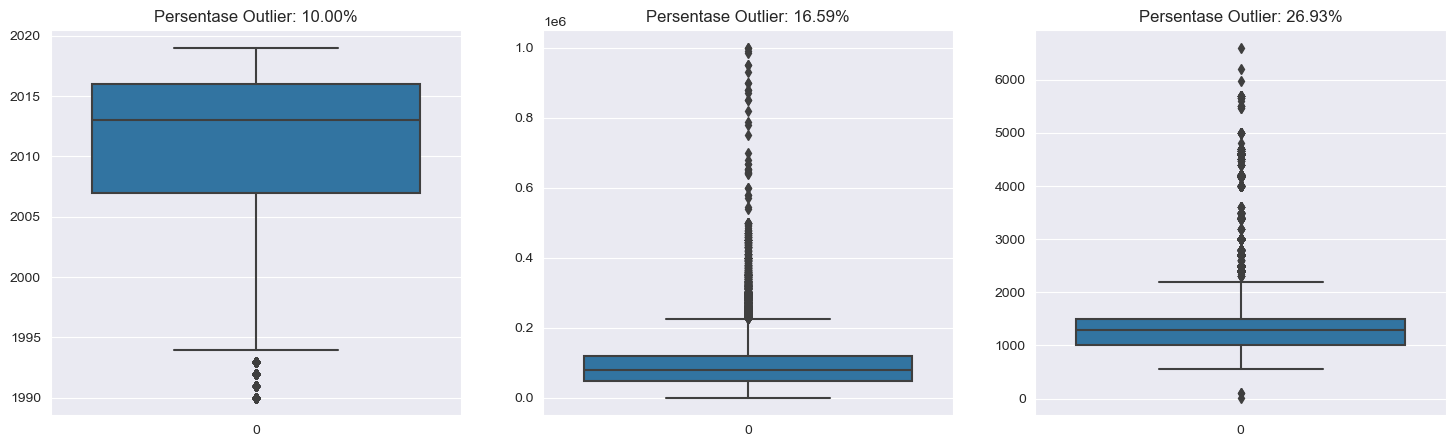

In [207]:
warnings.filterwarnings("ignore")

def outlier_analysis(data, col):
    skewness = data[col].skew()
    if skewness >= -0.5 and skewness <= 0.5:
        upper = data[col].mean() + 3 * data[col].std()
        lower = data[col].mean() - 3 * data[col].std()
    else:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q1 + 1.5 * IQR
        lower = Q3 - 1.5 * IQR

    no_outliers = data[(data[col] >= lower) & (data[col] <= upper)]
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    return outliers, no_outliers, upper, lower

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
cols_to_plot = num_cols[:3]  # Mengambil tiga kolom pertama

for i, col in enumerate(cols_to_plot):
    out, no_out, up, low = outlier_analysis(new_data, col)
    sns.boxplot(new_data[col], ax=ax[i])
    ax[i].set_title('Persentase Outlier: {:.2f}%'.format(len(out) * 100 / len(data)))

plt.show()


dilihat dari visualisasi diatas ada outlier dan saya akan menghilangkan outlier tersebut

#### **Split Data**

In [208]:
train, test = train_test_split(new_data, train_size=0.8)

#### **Handling outlier**

In [209]:
new_train = train.copy()
cols= ['Model Year', 'Mileage', 'Engine Capacity']
for col in cols:
  out,no_out, up, low = outlier_analysis(new_train,col)
  pct_out = len(out)*100/len(train)

  if pct_out<=15:
    new_train = new_train[(new_train[col]>=low) & (new_train[col]<=up)]
  else:
    new_train[col] = new_train[col].apply(lambda x: up if x>=up else low if x<=low else x)

print(f"Jumlah data train sebelum outlier handling: {len(train)}")
print(f"Jumlah data train setelah outlier handling: {len(new_train)}")

Jumlah data train sebelum outlier handling: 36165
Jumlah data train setelah outlier handling: 32528


setelah dilakukan handling outlier ada perubahan data pada data train

#### **Scaling**

In [210]:
norm = 0
nonorm = 0
for col in num_cols:
  if train[col].skew() >=-0.5 and train[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [211]:
num_train_scaled = pd.DataFrame(scaler.fit_transform(new_train[num_cols]))
num_test_scaled = pd.DataFrame(scaler.transform(test[num_cols]))

In [212]:
new_data[cat_cols].head()

,Company Name,Engine Type,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Petrol,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Petrol,Local,Sedan,Automatic,Registered
2,Suzuki,Petrol,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Petrol,Local,Hatchback,Manual,Registered
4,Toyota,Petrol,Local,Sedan,Manual,Registered


#### **Encoder**

In [213]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

encoder.fit(new_train[cat_cols])
cat_train = pd.DataFrame(encoder.transform(new_train[cat_cols]))
cat_test = pd.DataFrame(encoder.transform(test[cat_cols]))

In [214]:
cat_train.head()

,0,1,2,3,4,5
0,9.0,2.0,0.0,3.0,0.0,0.0
1,26.0,2.0,0.0,1.0,0.0,1.0
2,9.0,2.0,1.0,4.0,0.0,0.0
3,6.0,2.0,1.0,1.0,1.0,0.0
4,25.0,2.0,1.0,1.0,1.0,0.0


In [215]:
X_train = pd.concat([num_train_scaled,cat_train],axis=1)
X_test = pd.concat([num_test_scaled,cat_test],axis=1)

y_train = new_train['Price']
y_test = test['Price']

# **Model Definition**

menampilkan senua model yang ingin dipakai dan mencari model yang terbaik

## SVM

In [216]:
model = SVR(kernel='rbf', C=0.1, epsilon=0.5)

start = time()
model.fit(X_train,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

Durasi training: 71.00858235359192 detik
==================== TRAINING ====================
Mean absolute error: 1169763.3698450988
R2 Score: -0.03693312256767478


==================== TEST ====================
Mean absolute error: 1206042.6180922864
R2 Score: -0.030035833930472045


In [217]:
model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=3)

start = time()
model.fit(X_train, y_train)
end = time()

print(f"Durasi training: {end-start} detik")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20, "TRAINING", "="*20)
print("Mean absolute error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("\n")
print("="*20, "TEST", "="*20)
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

Durasi training: 0.027202129364013672 detik
==================== TRAINING ====================
Mean absolute error: 363272.6818858351
R2 Score: 0.8164801448895423


==================== TEST ====================
Mean absolute error: 405815.30619152915
R2 Score: 0.8337514933979341


## Adaboost

In [218]:
# Ganti model dengan Adaboost Regressor
model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0)

start = time()
model.fit(X_train, y_train)
end = time()

print(f"Durasi training: {end-start} detik")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20, "TRAINING", "="*20)
print("Mean absolute error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("\n")
print("="*20, "TEST", "="*20)
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))


Durasi training: 1.0848028659820557 detik
==================== TRAINING ====================
Mean absolute error: 1481739.9667582558
R2 Score: 0.31853816274017466


==================== TEST ====================
Mean absolute error: 1630984.5390926686
R2 Score: 0.23286786620702782


## KNeighborsRegressor

In [219]:
model = KNeighborsRegressor(n_neighbors=3, weights='uniform')

start = time()
model.fit(X_train, y_train)
end = time()

print(f"Durasi training: {end-start} detik")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20, "TRAINING", "="*20)
print("Mean absolute error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("\n")
print("="*20, "TEST", "="*20)
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

Durasi training: 0.062232017517089844 detik
==================== TRAINING ====================
Mean absolute error: 198599.22733234958
R2 Score: 0.9333449559303251


==================== TEST ====================
Mean absolute error: 311196.74850696744
R2 Score: 0.8802417047712143


## RandomForest

In [220]:
model = RandomForestRegressor(n_estimators=200, max_depth=6, min_samples_leaf=2, min_samples_split=3)

start = time()
model.fit(X_train,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

Durasi training: 3.6485719680786133 detik
==================== TRAINING ====================
Mean absolute error: 350020.2042800313
R2 Score: 0.8391125334879935


==================== TEST ====================
Mean absolute error: 415826.73027459247
R2 Score: 0.8021634888750728


## Cross Validation

melakukan cross validation pada semmua model untuk mengecek niali r2 score

In [221]:
# Daftar model yang akan diuji
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

# Tentukan metrik yang ingin dievaluasi
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

# Lakukan cross-validation untuk setiap model
for model_name, model in models.items():
    print(f"\nCross-Validation Scores for {model_name}:")
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        print(f"{metric}: {scores}")
        print(f"Rata-rata {metric}: {scores.mean()}")
        print(f"Standar deviasi {metric}: {scores.std()}")


Cross-Validation Scores for RandomForestRegressor:
MAE: [262930.45376944 264443.79049094 248402.76396674 262456.4926808
 296554.80178959]
Rata-rata MAE: 266957.6605395012
Standar deviasi MAE: 15893.856713117746
R2: [0.84193957 0.90320924 0.90030628 0.90155178 0.81561816]
Rata-rata R2: 0.8725250047409332
Standar deviasi R2: 0.036687146723778485

Cross-Validation Scores for DecisionTreeRegressor:
MAE: [296065.09335915 302536.89453448 262509.32463068 294301.17929567
 346627.45015209]
Rata-rata MAE: 300407.98839441576
Standar deviasi MAE: 26956.384981131672
R2: [0.78187612 0.81196217 0.89818311 0.83488647 0.66840678]
Rata-rata R2: 0.799062931070483
Standar deviasi R2: 0.07568479746565468

Cross-Validation Scores for SVR:
MAE: [1158054.01031112 1174395.9442413  1145993.05213376 1204857.48207896
 1165306.04141124]
Rata-rata MAE: 1169721.3060352744
Standar deviasi MAE: 19874.87606884451
R2: [-0.03802899 -0.03767435 -0.03532663 -0.03742976 -0.03828104]
Rata-rata R2: -0.03734815179462703
Stand

# **Model Training**

## Model Improvement

In [223]:
# Feature Selection
num_cols = ['Model Year', 'Mileage', 'Engine Capacity']
cat_cols = ['Company Name', 'Engine Type', 'Assembly', 'Body Type', 'Transmission Type', 'Registration Status']

X_train = new_train.drop(columns='Price')
X_test = test.drop(columns='Price')

y_train = new_train['Price']
y_test = test['Price']

X_train

,Company Name,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
8144,Honda,2007,98000.0,Petrol,1750.0,Imported,SUV,Automatic,Registered
43236,Toyota,2016,39000.0,Petrol,1000.0,Imported,Hatchback,Automatic,Un-Registered
33434,Honda,2015,49000.0,Petrol,1750.0,Local,Sedan,Automatic,Registered
35018,Daihatsu,2006,120000.0,Petrol,800.0,Local,Hatchback,Manual,Registered
39917,Suzuki,2008,100000.0,Petrol,800.0,Local,Hatchback,Manual,Registered
...,...,...,...,...,...,...,...,...,...
1076,Honda,2015,82311.0,Petrol,1300.0,Local,Sedan,Manual,Registered
40141,Toyota,2014,50000.0,Petrol,1750.0,Imported,Sedan,Automatic,Registered
39244,Suzuki,2017,85000.0,Petrol,1000.0,Local,Hatchback,Manual,Registered
32756,Suzuki,2005,100000.0,Petrol,1000.0,Local,Hatchback,Manual,Registered


#### **Pipeline**

In [224]:
scaler = MinMaxScaler()
encoding = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20)
model = RandomForestRegressor()

preprocess = ColumnTransformer([('num',scaler,num_cols),
                               ('cat',encoding,cat_cols)])
pipe = Pipeline([('preprocess',preprocess),('model',model)])

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Model Year', 'Mileage',
                                                   'Engine Capacity']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=20),
                                                  ['Company Name',
                                                   'Engine Type', 'Assembly',
                                                   'Body Type',
                                                   'Transmission Type',
                                                   'Registration Status'])])),
                ('model', RandomForestRegressor())])

### RandomizedSearch

hyperparameter tunning dengan memasukkan model terbaik, encode, dan scaler yang ingin di pakai

In [225]:
params = [{'preprocess__num':[MinMaxScaler(),StandardScaler(),RobustScaler()],
          'preprocess__cat':[OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20),
                             OneHotEncoder(handle_unknown='ignore')],
          'model':[RandomForestRegressor()],
          'model__n_estimators':[100,150,200,250,300],
          'model__max_depth':[2,3,4,5,6,7,8]},
]

grid = RandomizedSearchCV(pipe, params, cv=3, n_iter=50, verbose=3)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END model=RandomForestRegressor(), model__max_depth=6, model__n_estimators=150, preprocess__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20), preprocess__num=StandardScaler();, score=nan total time=   0.0s
[CV 2/3] END model=RandomForestRegressor(), model__max_depth=6, model__n_estimators=150, preprocess__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20), preprocess__num=StandardScaler();, score=nan total time=   0.0s
[CV 3/3] END model=RandomForestRegressor(), model__max_depth=6, model__n_estimators=150, preprocess__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20), preprocess__num=StandardScaler();, score=nan total time=   0.0s
[CV 1/3] END model=RandomForestRegressor(), model__max_depth=7, model__n_estimators=100, preprocess__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20), preprocess__num=RobustScaler();, score=nan tot

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['Model '
                                                                                'Year',
                                                                                'Mileage',
                                                                                'Engine '
                                                                                'Capacity']),
                                                                              ('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=20),
                                                                               ['Company '
                                                                                'Name',
                                                                                'Engine '
                                                                                'Type',
                                                                                'Assembly',
                                                                                'Body '
                                                                                'Type',
                                                                                'Transmission '
                                                                                'Type',
                                                                                'Registration '
                                                                                'Status'])])),
                                             ('mode...
                   param_distributions=[{'model': [RandomForestRegressor(max_depth=8,
                                                                         n_estimators=250)],
                                         'model__max_depth': [2, 3, 4, 5, 6, 7,
                                                              8],
                                         'model__n_estimators': [100, 150, 200,
                                                                 250, 300],
                                         'preprocess__cat': [OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                            unknown_value=20),
                                                             OneHotEncoder(handle_unknown='ignore')],
                                         'preprocess__num': [MinMaxScaler(),
                                                             StandardScaler(),
                                                             RobustScaler()]}],
                   verbose=3)

In [226]:
grid_best = grid.best_estimator_
grid_best

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Model Year', 'Mileage',
                                                   'Engine Capacity']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Name',
                                                   'Engine Type', 'Assembly',
                                                   'Body Type',
                                                   'Transmission Type',
                                                   'Registration Status'])])),
                ('model',
                 RandomForestRegressor(max_depth=8, n_estimators=250))])

In [227]:
grid.best_params_

{'preprocess__num': RobustScaler(),
 'preprocess__cat': OneHotEncoder(handle_unknown='ignore'),
 'model__n_estimators': 250,
 'model__max_depth': 8,
 'model': RandomForestRegressor(max_depth=8, n_estimators=250)}

didapatkan dari hyperpaameter tunning model yang paling bagus adalah RandomForestRegressor dengan scaler adalah RobustScaler dan encode didapatkan OnehotEncoder

# **Model Evaluation**

melakukan predict dengan model terbaik yang sudah disimpan dari hyperparameter tunning

In [228]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
Mean absolute error: 288091.3380199899
R2 Score: 0.9210336002491265


==================== TEST ====================
Mean absolute error: 368729.6987326847
R2 Score: 0.857946821906135


# **Model Saving**

melakukan saving model yang terbaik setelah melakukan hyperparameter tunning

In [229]:
# Menyimpan objek 'model_knn' ke dalam berkas 'model_knn.pkl' menggunakan modul 'pickle'
with open('model_grid.pkl', 'wb') as file_1:
    pickle.dump(grid_best, file_1)

# **Model Inference**

model inference ada di notebook yang lain

# **Kesimpulan**

kesimpulan yang didapat adalah setelah melakukan hyperparameter tunning didapatkan hasil scaling terbaik menggunakan robustscaler utuk encoding menggunakan onehotencoding dan untuk model didapatkan yang terbaik adalah RandomForestRegressor. untuk training didapatkan ketepatan model adalah 92% dan untuk test 85%.

The conclusion that was obtained was that after carrying out hyperparameter tuning, the best scaling results were obtained using a robustscaler for encoding using OneHotencoding and for the model, the best was RandomForestRegressor. For training, the model accuracy was 92% and for testing 85%.


# **Conceptual Problem**

**1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !** adalah salah satu teknik ensemble learning yang digunakan dalam machine learning untuk meningkatkan kinerja model prediksi. Latar belakang adanya bagging adalah untuk mengurangi varians (overfitting) dalam model prediks

**2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !**

    - Forest menggunakan teknik Bagging (Bootstrap Aggregating) untuk menghasilkan beberapa pohon keputusan yang independen. Setiap pohon keputusan dibangun dengan subsample acak dari data pelatihan dan variabel prediktor yang dipilih secara acak.
    
    - Boosting menggabungkan serangkaian model basis secara berurutan. Setiap model baru dibangun untuk memperbaiki kesalahan model sebelumnya. Pada setiap iterasi, bobot diberikan kepada sampel yang salah dikelasifikasi oleh model sebelumnya.

**3. Jelaskan apa yang dimaksud dengan Cross Validation !** adalah sebuah teknik dalam pembelajaran mesin yang digunakan untuk mengevaluasi kinerja model secara objektif dan mengurangi risiko overfitting.